# Project 2: Ames Housing Data and Kaggle Challenge

## Problem statement: 
I am a real estate agent whose role is to advise my clients how much their house is valued. A house is a huge asset for most families and I will assist to provide data insights and predictions to help them maximise the amount of financial gains through the sale of their houses.

I will be using regression models on the Ames housing dataset to predict the sale price of my clients' houses. Thereafter I will also advise them on the features of the houses that can influence the sale price.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

%matplotlib inline

## 1. Data Preparation

### Import dataset

In [2]:
train = pd.read_csv('../project_2/datasets/train.csv')
train.head(10)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
9,1956,535426130,60,RL,70.0,11606,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,9,2007,WD,135000


In [3]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns" , None)

### Data cleaning

In [4]:
#change column names to remove spaces and to lowercase
train.columns = train.columns.str.replace(' ','_').str.lower()

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [6]:
#drop id and pid columns as it is irrelevant for sale price
train = train.drop("id", axis=1)
train = train.drop("pid", axis=1)

In [7]:
train.isnull().sum().sort_values(ascending=False)

pool_qc            2042
misc_feature       1986
alley              1911
fence              1651
fireplace_qu       1000
lot_frontage        330
garage_finish       114
garage_qual         114
garage_yr_blt       114
garage_cond         114
garage_type         113
bsmt_exposure        58
bsmtfin_type_2       56
bsmt_cond            55
bsmt_qual            55
bsmtfin_type_1       55
mas_vnr_area         22
mas_vnr_type         22
bsmt_full_bath        2
bsmt_half_bath        2
garage_area           1
garage_cars           1
total_bsmt_sf         1
bsmt_unf_sf           1
bsmtfin_sf_2          1
bsmtfin_sf_1          1
3ssn_porch            0
screen_porch          0
full_bath             0
half_bath             0
bedroom_abvgr         0
kitchen_abvgr         0
kitchen_qual          0
totrms_abvgrd         0
functional            0
paved_drive           0
wood_deck_sf          0
open_porch_sf         0
sale_type             0
enclosed_porch        0
yr_sold               0
mo_sold         

### Inputting the missing values

In [8]:
train['pool_qc'].unique()
#Data documentation shows NA value for no pool. We infer that null values refer to no pool (NA)

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [9]:
train['pool_qc'] = train['pool_qc'].fillna('NA')

In [10]:
train['misc_feature'].unique()
#Data documentation shows NA value for None. We infer that null values refer to no misc features (NA)

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [11]:
train['misc_feature'] = train['misc_feature'].fillna('NA')

In [12]:
train['alley'].unique()
#Data documentation shows NA value for No alley access. We infer that null values refer to No alley access(NA)

array([nan, 'Pave', 'Grvl'], dtype=object)

In [13]:
train['alley'] = train['alley'].fillna('NA')

In [14]:
train['fence'].unique()
#Data documentation shows NA value for No fence. We infer that null values refer to No fence(NA)

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [15]:
train['fence'] = train['fence'].fillna('NA')

In [16]:
train['fireplace_qu'].unique()
#Data documentation shows NA value for No fireplace. We infer that null values refer to No fireplace(NA)

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [17]:
train['fireplace_qu'] = train['fireplace_qu'].fillna('NA')

In [18]:
train['lot_frontage'].unique()

array([ nan,  43.,  68.,  73.,  82., 137.,  35.,  70.,  21.,  64., 120.,
        24.,  74.,  93.,  34.,  80.,  71.,  72., 109.,  40., 103., 100.,
        92.,  65.,  75.,  60.,  30.,  79.,  41., 105., 107.,  81.,  36.,
        63.,  32.,  94.,  44.,  50.,  48.,  67.,  88.,  83.,  53.,  58.,
        57.,  52.,  87., 134.,  56.,  54., 140.,  78.,  85.,  90.,  96.,
        62.,  49.,  59., 155.,  91.,  61.,  86., 128.,  77.,  42.,  89.,
        51.,  69.,  55., 112.,  76., 125.,  98., 113., 102.,  22., 122.,
        84., 119., 118.,  66.,  95., 108., 195., 106.,  39., 110., 130.,
        97.,  45.,  37., 123.,  38., 129., 115.,  47., 114., 104.,  46.,
       121., 124., 313., 141., 101.,  99., 160., 174.,  26., 144., 138.,
       111.,  25.,  33., 200., 150., 117., 153., 116., 135.])

In [19]:
train[train['lot_frontage'].isnull()]

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,60,RL,NaN,13517,Pave,NA,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NA,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NA,NA,NA,0,3,2010,WD,130500
7,20,RL,NaN,12160,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NA,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NA,MnPrv,NA,0,5,2010,COD,142000
8,20,RL,NaN,15783,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NA,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NA,MnPrv,Shed,400,6,2007,WD,112500
23,20,RL,NaN,7980,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NA,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NA,GdPrv,Shed,500,3,2010,WD,185000
27,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NA,NA,NA,0,7,2008,WD,198000
31,70,RL,NaN,11435,Pave,NA,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,1Fam,2Story,8,7,1929,1950,Gable,CompShg,BrkFace,Stucco,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,792.0,792.0,GasA,Fa,Y,SBrkr,792,725,0,1517,0.0,0.0,1,0,3,1,Gd,7,Typ,2,Gd,Detchd,1931.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,6,2006,WD,230000
42,85,RL,NaN,9101,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,6,1978,1978,Gable,CompShg,Plywood,Plywood,BrkFace,104.0,TA,Gd,PConc,Gd,TA,Av,GLQ,1097.0,Unf,0.0,0.0,1097.0,GasA,Ex,Y,SBrkr,1110,0,0,1110,1.0,0.0,1,0,1,1,Gd,4,Typ,1,TA,Attchd,1978.0,Fin,2.0,602.0,TA,TA,Y,303,30,0,0,0,0,NA,NA,NA,0,7,2009,WD,165500
50,160,FV,NaN,2998,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,6,5,2000,2000,Gable,CompShg,MetalSd,MetalSd,BrkFace,513.0,Gd,TA,PConc,Gd,TA,No,GLQ,353.0,Unf,0.0,403.0,756.0,GasA,Ex,Y,SBrkr,768,756,0,1524,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NA,Detchd,2000.0,Unf,2.0,440.0,TA,TA,Y,0,32,0,0,0,0,NA,NA,NA,0,6,2006,WD,166000
59,60,RL,NaN,15038,Pave,NA,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1996,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Rec,138.0,Unf,0.0,778.0,916.0,GasA,Gd,Y,SBrkr,916,720,0,1636,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1996.0,Fin,2.0,386.0,TA,TA,Y,168,84,0,0,0,0,NA,NA,NA,0,11,2008,WD,173000
62,20,RL,NaN,20062,Pave,NA,IR1,Low,AllPub,Inside,Mod,ClearCr,Norm,Norm,1Fam,1Story,7,7,1977,2001,Hip,CompShg

In [20]:
#'lot_frontage' missing values seem to be at random. To fill up with mean of the values 
train['lot_frontage'] = train['lot_frontage'].fillna(train['lot_frontage'].mean())

In [21]:
train['garage_finish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [22]:
train['garage_finish'] = train['garage_finish'].fillna('NA')

In [23]:
train['garage_qual'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Ex', 'Po'], dtype=object)

In [24]:
train['garage_qual'] = train['garage_qual'].fillna('NA')

In [25]:
train['garage_yr_blt'].unique()

array([1976., 1997., 1953., 2007., 1957., 1966., 2005., 1959., 1952.,
       1969., 1971., 1900., 2000., 2004., 1916., 1963., 1977., 2009.,
       1968., 1992., 1955., 1961., 1973., 1937.,   nan, 2003., 1981.,
       1931., 1995., 1958., 1965., 2006., 1978., 1954., 1935., 1951.,
       1996., 1999., 1920., 1930., 1924., 1960., 1949., 1986., 1956.,
       1994., 1979., 1964., 2001., 1972., 1939., 1962., 1927., 1948.,
       1967., 1993., 2010., 1915., 1987., 1970., 1988., 1982., 1941.,
       1984., 1942., 1950., 2002., 1975., 2008., 1974., 1998., 1918.,
       1938., 1985., 1923., 1980., 1991., 1946., 1940., 1990., 1896.,
       1983., 1914., 1945., 1921., 1925., 1926., 1936., 1932., 1947.,
       1929., 1910., 1917., 1922., 1934., 1989., 1928., 2207., 1933.,
       1895., 1919.])

In [26]:
train[train['garage_yr_blt'].isnull()]
# garage_yr_blt missing values are because of no garage. to input as 0

,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
28,190,C (all),75.0000,8250,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Feedr,Norm,2fmCon,2Story,5,6,1895,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,957.0,957.0,GasA,Fa,N,SBrkr,1034,957,0,1991,0.0,0.0,2,0,4,2,TA,9,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,N,0,0,133,0,0,0,NA,NA,NA,0,6,2007,WD,119600
53,160,RM,21.0000,1476,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,176.0,Unf,0.0,370.0,546.0,GasA,Ex,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,Y,200,26,0,0,0,0,NA,NA,NA,0,3,2010,WD,76000
65,20,RL,70.0000,8402,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Feedr,Norm,1Fam,1Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,ALQ,206.0,Unf,0.0,914.0,1120.0,GasA,Ex,Y,SBrkr,1120,0,0,1120,0.0,0.0,1,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,Y,0,30,0,0,0,0,NA,NA,NA,0,12,2007,New,147000
79,50,RM,50.0000,7288,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1925,2003,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,Gd,BrkTil,TA,Po,No,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,665,0,1601,0.0,0.0,2,0,3,1,TA,6,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,N,0,0,0,176,0,0,NA,NA,NA,0,9,2007,WD,129850
101,30,RL,58.0000,9098,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,4,7,1920,2002,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,Mn,ALQ,348.0,Unf,0.0,180.0,528.0,GasA,Ex,Y,SBrkr,605,0,0,605,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,N,0,0,144,0,0,0,NA,NA,NA,0,7,2007,WD,86000
103,30,C (all),72.0000,9392,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,3,1900,1950,Mansard,CompShg,AsbShng,AsbShng,None,0.0,TA,Fa,CBlock,Fa,TA,No,Unf,0.0,Unf,0.0,245.0,245.0,GasA,TA,N,SBrkr,797,0,0,797,0.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,N,0,36,94,0,0,0,NA,NA,NA,0,9,2009,WD,44000
114,20,RL,69.0552,9000,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Sawyer,Norm,Norm,1Fam,1Story,2,2,1947,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,GasA,Fa,N,SBrkr,660,0,0,660,0.0,0.0,1,0,2,1,Fa,5,Min2,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,N,0,0,100,0,0,0,NA,NA,NA,0,6,2009,WD,63900
120,30,RL,63.0000,13907,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1940,1969,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,290.0,Unf,0.0,706.0,996.0,GasA,Ex,Y,SBrkr,996,0,0,996,1.0,0.0,1,0,3,1,TA,6,Typ,1,Gd,NaN,NaN,NA,0.0,0.0,NA,NaN,Y,144,0,0,0,0,0,NA,NA,NA,0,7,2008,WD,108000
134,30,RL,67.0000,5604,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1925,1950,Gable,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,Unf,0.0,396.0,864.0,GasA,TA,N,FuseA,864,0,0,864,1.0,0.0,1,0,2,1,TA,5,Typ,0,NA,NaN,NaN,NA,0.0,0.0,NA,NaN,Y,0,0,96,0,0,0,NA,NA,NA,0,4,2008,WD,98000
136,50,RL,54.0000,6342,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,780.0,

In [27]:
train['garage_yr_blt'] = train['garage_yr_blt'].fillna(0)

In [28]:
train['garage_cond'].unique()

array(['TA', 'Fa', nan, 'Po', 'Gd', 'Ex'], dtype=object)

In [29]:
train['garage_cond'] = train['garage_cond'].fillna('NA')

In [30]:
train['garage_type'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'Basment', nan, '2Types', 'CarPort'],
      dtype=object)

In [31]:
train['garage_type'] = train['garage_type'].fillna('NA')

In [32]:
train['bsmt_exposure'].unique()

array(['No', 'Gd', 'Av', nan, 'Mn'], dtype=object)

In [33]:
train['bsmt_exposure'] = train['bsmt_exposure'].fillna('NA')

In [34]:
train['bsmtfin_type_2'].unique()

array(['Unf', 'Rec', nan, 'BLQ', 'GLQ', 'LwQ', 'ALQ'], dtype=object)

In [35]:
train['bsmtfin_type_2'] = train['bsmtfin_type_2'].fillna('NA')

In [36]:
train['bsmtfin_type_1'] = train['bsmtfin_type_1'].fillna('NA')

In [37]:
train['bsmt_cond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [38]:
train['bsmt_cond'] = train['bsmt_cond'].fillna('NA')

In [39]:
train['bsmt_qual'] = train['bsmt_qual'].fillna('NA')

In [40]:
train['mas_vnr_type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

In [41]:
train['mas_vnr_type'] = train['mas_vnr_type'].fillna('None')

In [42]:
train['mas_vnr_area'].unique()

array([2.890e+02, 1.320e+02, 0.000e+00, 8.200e+01, 1.800e+02, 1.920e+02,
       2.320e+02, 4.560e+02, 1.480e+02,       nan, 3.000e+00, 3.360e+02,
       4.800e+02, 3.200e+02, 1.040e+02, 3.350e+02, 4.000e+01, 1.100e+02,
       1.060e+02, 5.130e+02, 1.840e+02, 5.220e+02, 1.430e+02, 3.480e+02,
       1.170e+02, 5.100e+02, 1.450e+02, 9.600e+01, 6.680e+02, 5.000e+01,
       2.280e+02, 6.500e+01, 3.610e+02, 7.480e+02, 1.970e+02, 5.720e+02,
       1.280e+02, 1.200e+02, 2.540e+02, 8.600e+01, 3.000e+01, 5.400e+01,
       2.460e+02, 3.970e+02, 2.960e+02, 1.440e+02, 9.020e+02, 2.610e+02,
       2.600e+02, 2.750e+02, 5.700e+01, 1.050e+03, 3.590e+02, 1.080e+02,
       6.620e+02, 5.000e+02, 2.100e+02, 1.650e+02, 2.080e+02, 3.600e+02,
       1.600e+02, 6.400e+01, 2.240e+02, 2.060e+02, 1.160e+02, 6.510e+02,
       5.040e+02, 2.520e+02, 3.370e+02, 8.400e+01, 3.090e+02, 4.660e+02,
       6.000e+02, 1.890e+02, 3.680e+02, 1.980e+02, 1.400e+02, 9.220e+02,
       1.600e+01, 1.800e+01, 9.000e+01, 4.250e+02, 

In [43]:
train['mas_vnr_area'] = train['mas_vnr_area'].fillna(0)

In [44]:
train['mas_vnr_area'] = train['mas_vnr_area'].astype('float') 

In [45]:
train.isnull().sum().sort_values(ascending=False)

bsmt_full_bath     2
bsmt_half_bath     2
garage_cars        1
garage_area        1
total_bsmt_sf      1
bsmt_unf_sf        1
bsmtfin_sf_2       1
bsmtfin_sf_1       1
ms_subclass        0
kitchen_qual       0
fireplaces         0
functional         0
totrms_abvgrd      0
full_bath          0
kitchen_abvgr      0
bedroom_abvgr      0
half_bath          0
garage_type        0
gr_liv_area        0
low_qual_fin_sf    0
fireplace_qu       0
garage_finish      0
garage_yr_blt      0
pool_area          0
sale_type          0
yr_sold            0
mo_sold            0
misc_val           0
misc_feature       0
fence              0
pool_qc            0
screen_porch       0
1st_flr_sf         0
3ssn_porch         0
enclosed_porch     0
open_porch_sf      0
wood_deck_sf       0
paved_drive        0
garage_cond        0
garage_qual        0
2nd_flr_sf         0
heating_qc         0
electrical         0
year_built         0
overall_qual       0
house_style        0
bldg_type          0
condition_2  

In [46]:
#Since there are only single digit null values, we can drop these rows
train = train.dropna()

In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2048 entries, 0 to 2050
Data columns (total 79 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ms_subclass      2048 non-null   int64  
 1   ms_zoning        2048 non-null   object 
 2   lot_frontage     2048 non-null   float64
 3   lot_area         2048 non-null   int64  
 4   street           2048 non-null   object 
 5   alley            2048 non-null   object 
 6   lot_shape        2048 non-null   object 
 7   land_contour     2048 non-null   object 
 8   utilities        2048 non-null   object 
 9   lot_config       2048 non-null   object 
 10  land_slope       2048 non-null   object 
 11  neighborhood     2048 non-null   object 
 12  condition_1      2048 non-null   object 
 13  condition_2      2048 non-null   object 
 14  bldg_type        2048 non-null   object 
 15  house_style      2048 non-null   object 
 16  overall_qual     2048 non-null   int64  
 17  overall_cond  

There are no more null values.

## 2. EDA|

In [48]:
train.describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,totrms_abvgrd,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,57.038574,69.023543,10049.675293,6.114258,5.560547,1971.751465,1984.193848,98.770996,442.464844,48.005859,568.130859,1058.601562,1163.431152,329.378906,5.520996,1498.331055,0.427734,0.063477,1.576660,0.371094,2.842773,1.042969,6.435059,0.590820,1869.556641,1.776855,473.692871,93.886230,47.444824,22.501465,2.595215,16.535645,2.401367,51.649902,6.222168,2007.775879,181484.252441
std,42.839004,21.274118,6697.167566,1.426126,1.104349,30.174112,21.033925,174.411461,461.319862,165.074675,444.958855,448.999749,392.294626,425.680677,51.105842,497.948344,0.522715,0.251763,0.548553,0.501083,0.825631,0.209937,1.557145,0.637957,452.577134,0.764702,215.972053,128.597923,66.393358,59.738209,25.247901,57.412746,37.810135,573.810601,2.745331,1.312844,79248.657891
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1964.750000,0.000000,0.000000,0.000000,220.000000,793.000000,879.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.750000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129837.500000
50%,50.000000,69.055200,9432.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,995.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,70.000000,78.000000,11512.750000,7.000000,6.000000,2001.000000,2004.000000,160.000000,734.000000,0.000000,811.000000,1319.000000,1405.000000,691.750000,0.000000,1728.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


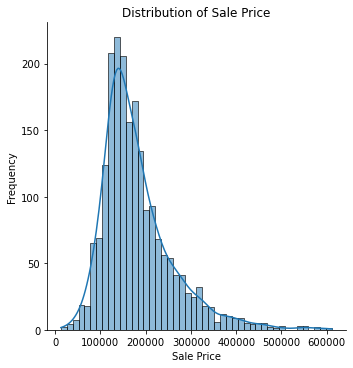

In [49]:
ax = sns.displot(data=train, x='saleprice', kde=True)
ax.set(xlabel='Sale Price',
       ylabel='Frequency',
       title='Distribution of Sale Price')
plt.show()

In [50]:
train['saleprice'].describe().T

count      2048.000000
mean     181484.252441
std       79248.657891
min       12789.000000
25%      129837.500000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

### Combining features

In [51]:
train['total_sf'] = train['total_bsmt_sf'] + train['gr_liv_area']
train['total_bath'] = train['bsmt_full_bath'] + 0.5 * train['bsmt_half_bath'] + train['full_bath'] + 0.5 * train['half_bath']

### Correlation matrix

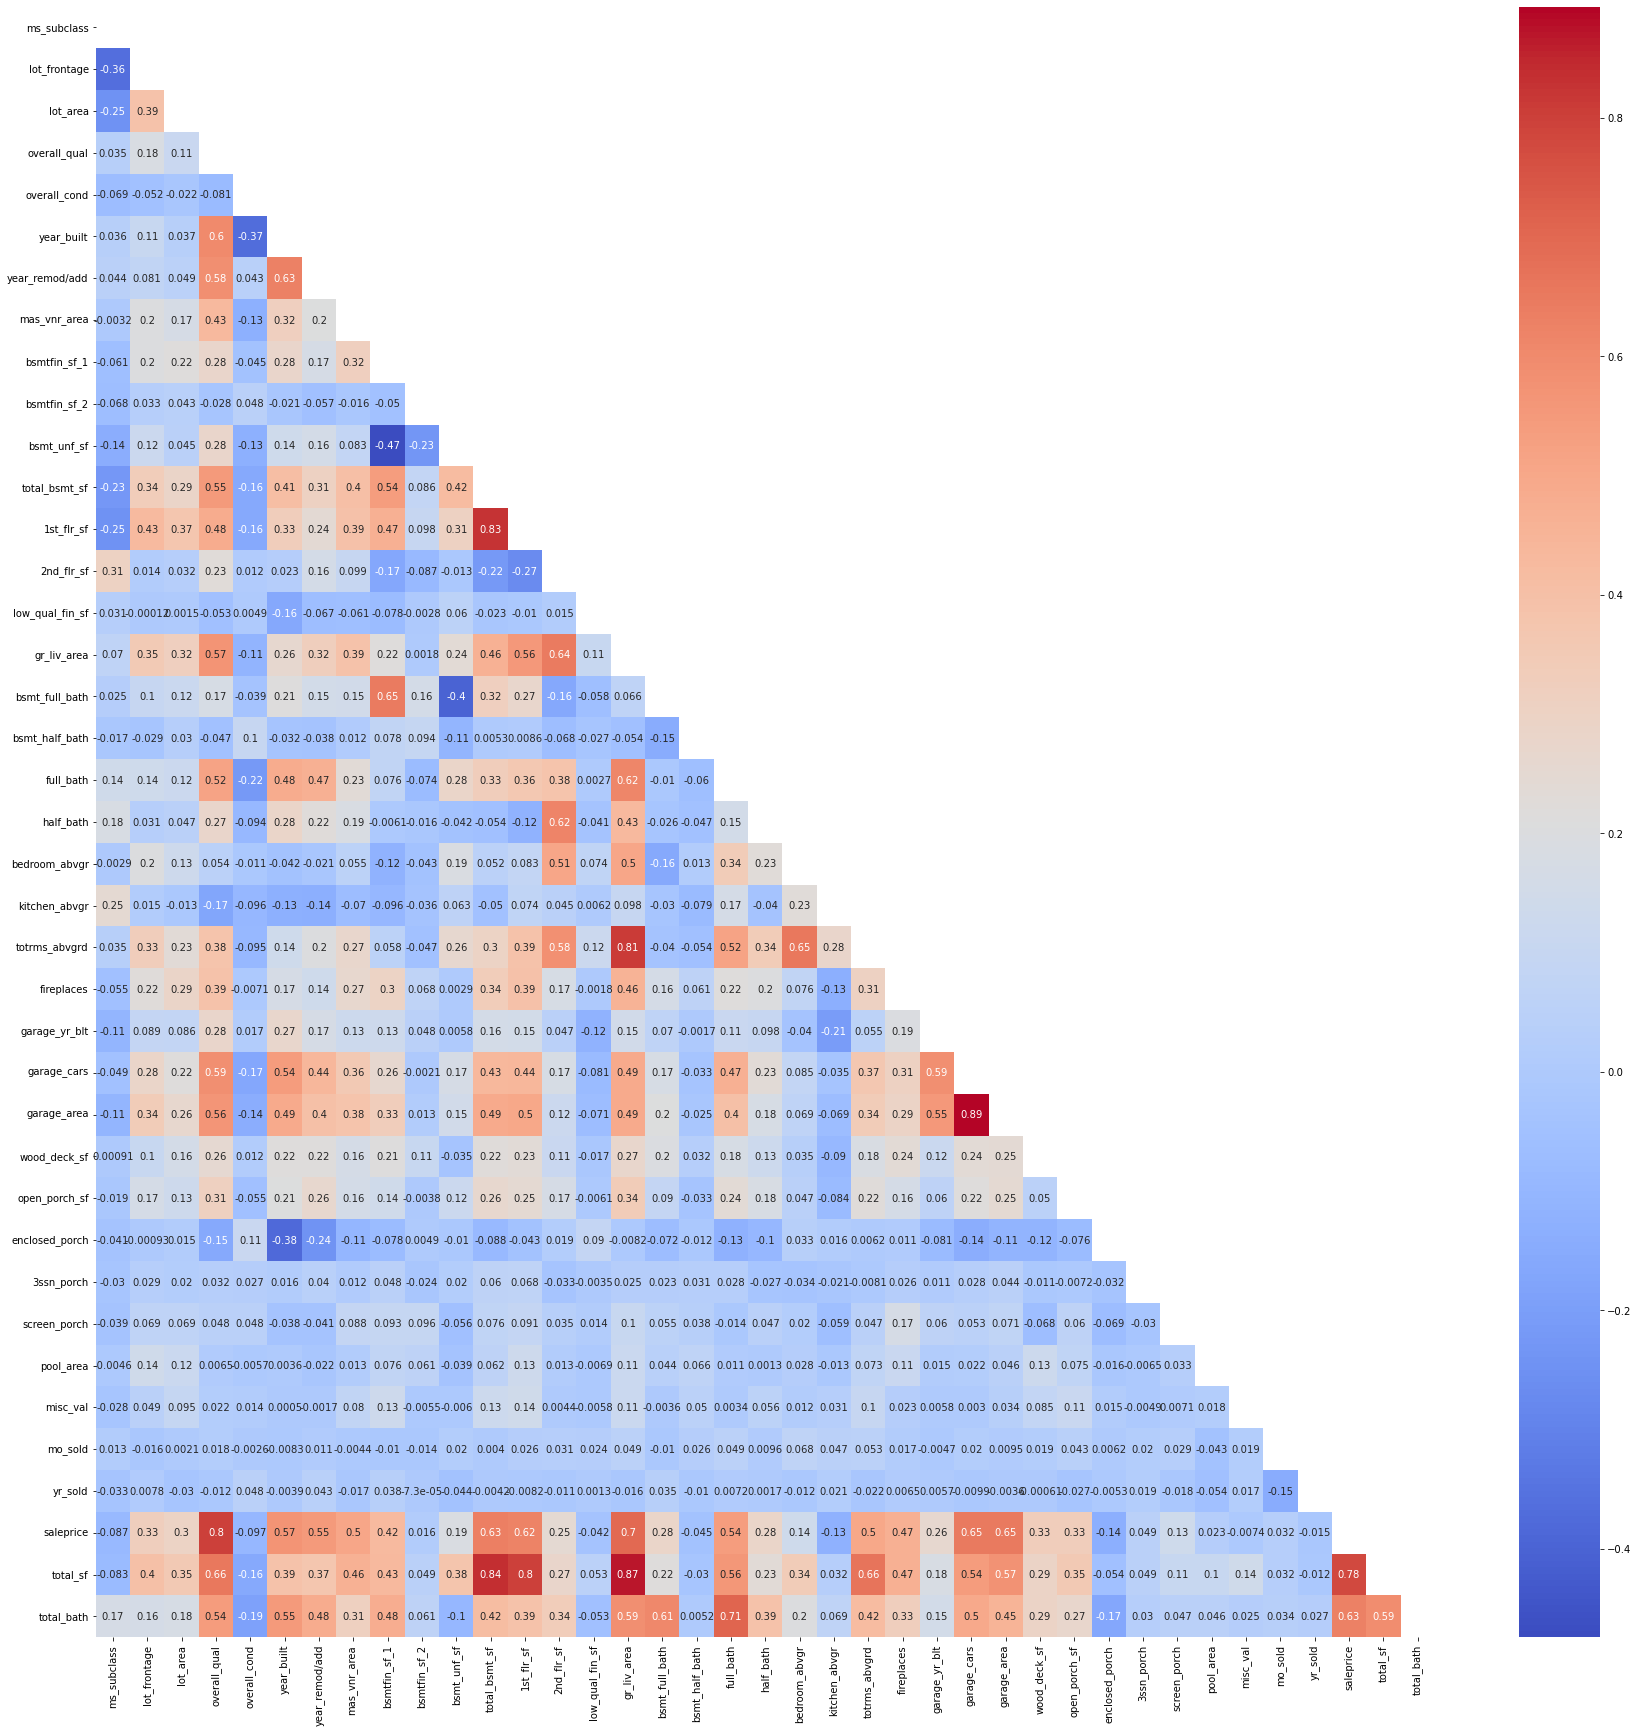

In [52]:
plt.figure(figsize=(30, 30))
mask = np.triu(np.ones_like(train.corr()))
 
dataplot = sns.heatmap(train.corr(), cmap="coolwarm", annot=True, mask=mask)
 
plt.show()

Several pairs of features have multicollinearity. 
To consider dropping some of the weaker features in relation to the target variable saleprice. <br>
1st_flr_sf and total_bsmt_sf. (drop total_bsmt_sf) <br>
1st_flr_sf and total_sf (drop 1st_flr_sf) <br>
totrms_abvgrd and gv_liv_area (drop totrms_abvgrd) <br>
total_sf and gv_liv_area (drop gr_liv_area) <br>
garage_area and garage_cars (drop garage_cars)<br>
total_bath and full_bath (drop full_bath)

In [53]:
train = train.drop(["total_bsmt_sf", "1st_flr_sf", "totrms_abvgrd", "gr_liv_area", "garage_cars", "full_bath"], axis=1)

In [54]:
#numerical columns
num_col = train.select_dtypes(exclude='object')

In [55]:
#categorical columns
cat_col = train.select_dtypes(exclude=['int64','float64'])

### Check for correlation with target variable 'saleprice'

In [56]:
num_col.corr()['saleprice'].sort_values(ascending=False)

saleprice          1.000000
overall_qual       0.800975
total_sf           0.779096
garage_area        0.650000
total_bath         0.629483
year_built         0.572256
year_remod/add     0.550055
mas_vnr_area       0.504025
fireplaces         0.470091
bsmtfin_sf_1       0.424463
open_porch_sf      0.332090
wood_deck_sf       0.327007
lot_frontage       0.325970
lot_area           0.295121
bsmt_full_bath     0.283564
half_bath          0.282023
garage_yr_blt      0.259150
2nd_flr_sf         0.249091
bsmt_unf_sf        0.191090
bedroom_abvgr      0.135178
screen_porch       0.134652
3ssn_porch         0.048755
mo_sold            0.031868
pool_area          0.023115
bsmtfin_sf_2       0.016393
misc_val          -0.007398
yr_sold           -0.015330
low_qual_fin_sf   -0.041650
bsmt_half_bath    -0.045378
ms_subclass       -0.087383
overall_cond      -0.097118
kitchen_abvgr     -0.125593
enclosed_porch    -0.135516
Name: saleprice, dtype: float64

Top features correlated with sale price are overall_qual, total_sf, garage_area, total_bath, year_built etc.

In [57]:
train.describe()

,ms_subclass,lot_frontage,lot_area,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,half_bath,bedroom_abvgr,kitchen_abvgr,fireplaces,garage_yr_blt,garage_area,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,misc_val,mo_sold,yr_sold,saleprice,total_sf,total_bath
count,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000,2048.000000
mean,57.038574,69.023543,10049.675293,6.114258,5.560547,1971.751465,1984.193848,98.770996,442.464844,48.005859,568.130859,329.378906,5.520996,0.427734,0.063477,0.371094,2.842773,1.042969,0.590820,1869.556641,473.692871,93.886230,47.444824,22.501465,2.595215,16.535645,2.401367,51.649902,6.222168,2007.775879,181484.252441,2556.932617,2.221680
std,42.839004,21.274118,6697.167566,1.426126,1.104349,30.174112,21.033925,174.411461,461.319862,165.074675,444.958855,425.680677,51.105842,0.522715,0.251763,0.501083,0.825631,0.209937,0.637957,452.577134,215.972053,128.597923,66.393358,59.738209,25.247901,57.412746,37.810135,573.810601,2.745331,1.312844,79248.657891,810.089428,0.806925
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000,334.000000,1.000000
25%,20.000000,60.000000,7500.000000,5.000000,5.000000,1954.000000,1964.750000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1957.750000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129837.500000,2013.000000,2.000000
50%,50.000000,69.055200,9432.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,475.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1978.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000,2457.000000,2.000000
75%,70.000000,78.000000,11512.750000,7.000000,6.000000,2001.000000,2004.000000,160.000000,734.000000,0.000000,811.000000,691.750000,0.000000,1.000000,0.000000,1.000000,3.000000,1.000000,1.000000,2001.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,2998.250000,3.000000
max,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,1862.000000,1064.000000,3.000000,2.000000,2.000000,8.000000,3.000000,4.000000,2207.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000,11752.000000,7.000000


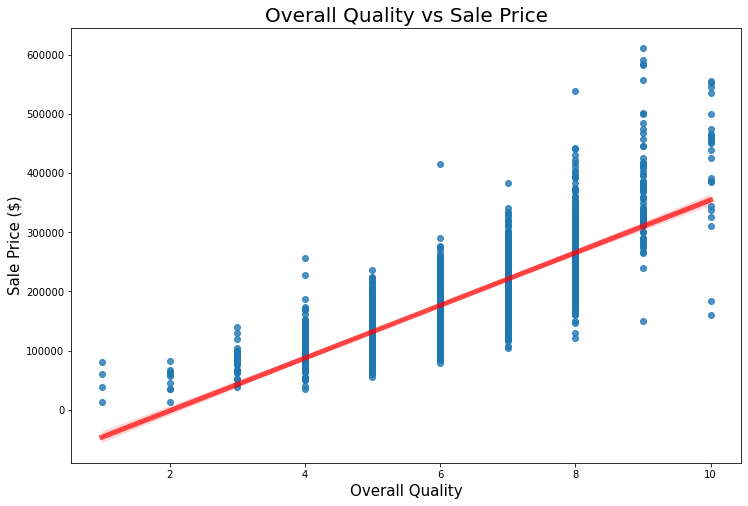

In [58]:
plt.figure(figsize=(12, 8))
sns.regplot(x=train["overall_qual"], y=train["saleprice"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Overall Quality vs Sale Price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Overall Quality', fontsize = 15);
plt.show()

There is a positive correlation between the overall quality rating and sale price.

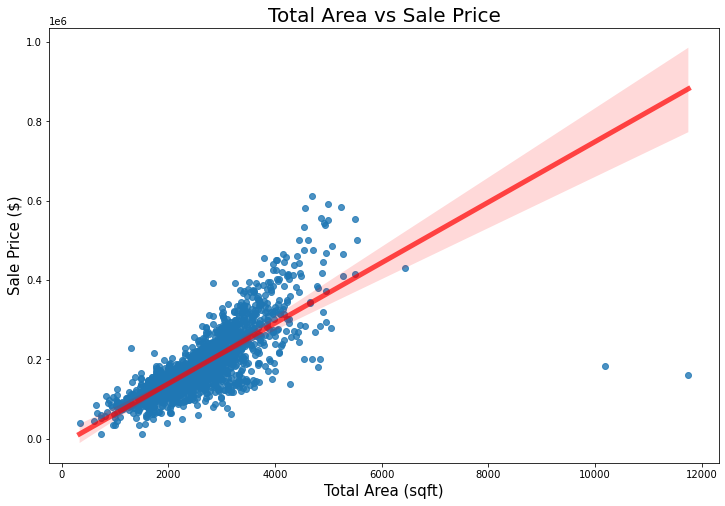

In [59]:
plt.figure(figsize=(12, 8))
sns.regplot(x=train["total_sf"], y=train["saleprice"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Total Area vs Sale Price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Total Area (sqft)', fontsize = 15);
plt.show()

There is a positive correlation between the total area and sale price and most houses have total area around 1000-4000sqft. However there are 2 points that are outliers.

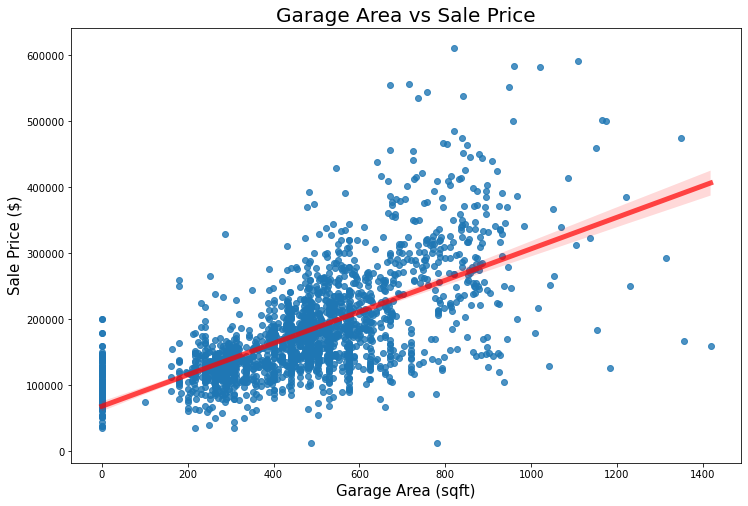

In [60]:
plt.figure(figsize=(12, 8))
sns.regplot(x=train["garage_area"], y=train["saleprice"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Garage Area vs Sale Price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Garage Area (sqft)', fontsize = 15);
plt.show()

There are several houses with no garage area  with maximum sale price of around $200,000. Most of the houses have garage area from 200 to 400sqft and very large garage areas more than 1,200 sqft tend to be outlier points. There  is a positive correlation between garage area and sale price but to a smaller extent as the size gets above 1000sqft. 

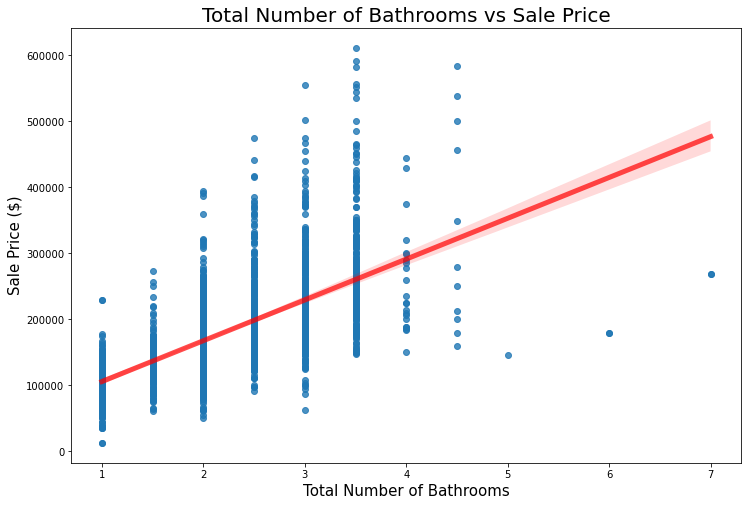

In [61]:
plt.figure(figsize=(12, 8))
sns.regplot(x=train["total_bath"], y=train["saleprice"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Total Number of Bathrooms vs Sale Price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Total Number of Bathrooms', fontsize = 15);
plt.show()

There is a positive correlation between the sale price and total number of bathrooms in each house. Most of the houses have 1-3.5 bathrooms and those with 3.5 bathrooms have the highest sale price. There are 3 houses with 5,6,7 bathrooms.

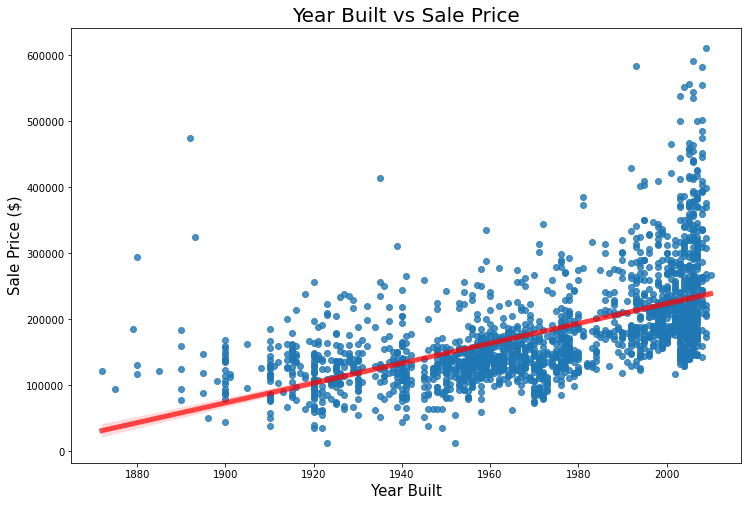

In [62]:
plt.figure(figsize=(12, 8))
sns.regplot(x=train["year_built"], y=train["saleprice"], line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title('Year Built vs Sale Price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Year Built', fontsize = 15);
plt.show()

There is a higher proportion of houses built after year 2000 that sold at a higher sale price. Most of the houses are built after 1950. Interestingly, there are some houses which are built before 1900 that command a higher range of sale price at 300k-500k

### Removing outliers

In [63]:
train = train[(train['total_sf'] < 10000) & (train['total_bath'] < 5)]

### Categorical Features

In [64]:
cat_col.columns

Index(['ms_zoning', 'street', 'alley', 'lot_shape', 'land_contour',
       'utilities', 'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type', 'exter_qual',
       'exter_cond', 'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type_1', 'bsmtfin_type_2', 'heating', 'heating_qc',
       'central_air', 'electrical', 'kitchen_qual', 'functional',
       'fireplace_qu', 'garage_type', 'garage_finish', 'garage_qual',
       'garage_cond', 'paved_drive', 'pool_qc', 'fence', 'misc_feature',
       'sale_type'],
      dtype='object')

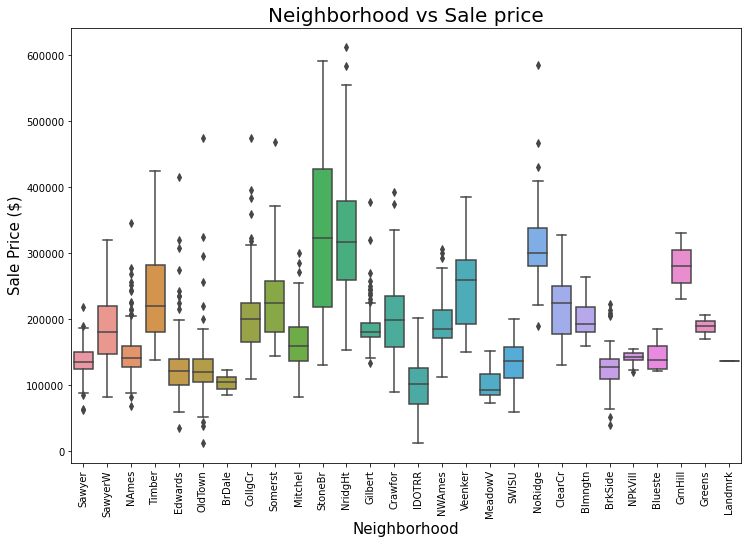

In [65]:
plt.figure(figsize = (12, 8))
sns.boxplot(x = "neighborhood", y = "saleprice", data = train)
plt.xticks(rotation = 90)
plt.title('Neighborhood vs Sale price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Neighborhood', fontsize = 15);
plt.show()

The most expensive neighborhoods are StoneBr, NridgHt and NoRidge with median sale prices of around $300000. 

The 3 cheapest neighborhoods are BrDale, IDOTRR and MeadowV with median sale prices of around $100000.

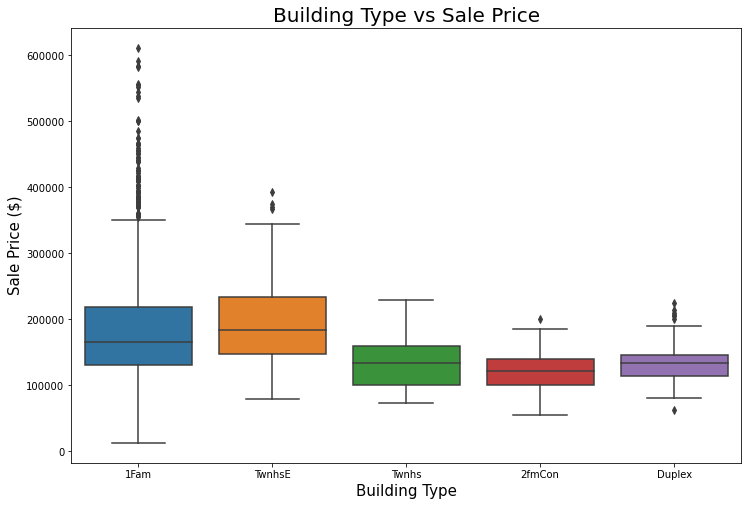

In [66]:
plt.figure(figsize=(12, 8))
sns.boxplot(x=train["bldg_type"], y=train["saleprice"])
plt.title('Building Type vs Sale Price', fontsize=20)
plt.ylabel('Sale Price ($)', fontsize = 15)
plt.xlabel('Building Type', fontsize = 15);
plt.show()

In [67]:
train['bldg_type'].value_counts()

1Fam      1695
TwnhsE     161
Duplex      70
Twnhs       69
2fmCon      46
Name: bldg_type, dtype: int64

There is no strong correlation between the building type and sale price. Most of the houses are of building type 1Fam (Single-family Detached)

## 3. Feature Engineering 

In [68]:
nominal_col = ['ms_zoning', 'street', 'alley', 'land_contour',
       'lot_config', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'roof_style', 'roof_matl',
       'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'foundation', 'heating',
       'central_air', 
       'garage_type', 'misc_feature',
       'sale_type']

In [69]:
ordinal_col = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',  'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']

In [70]:
#One hot encoding
train = pd.get_dummies(data=train,columns=nominal_col,drop_first=True)

In [71]:
ordinal_col = ['lot_shape', 'utilities', 'land_slope', 'exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'heating_qc', 'electrical', 'kitchen_qual', 'functional', 'fireplace_qu',  'garage_finish', 'garage_qual', 'garage_cond', 'paved_drive', 'pool_qc', 'fence']
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder object
label_encoder = LabelEncoder()

for i in ordinal_col:
    train[i] = label_encoder.fit_transform(train[i])

train.head()

,ms_subclass,lot_frontage,lot_area,lot_shape,utilities,land_slope,overall_qual,overall_cond,year_built,year_remod/add,mas_vnr_area,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,heating_qc,electrical,2nd_flr_sf,low_qual_fin_sf,bsmt_full_bath,bsmt_half_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,functional,fireplaces,fireplace_qu,garage_yr_blt,garage_finish,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_val,mo_sold,yr_sold,saleprice,total_sf,total_bath,ms_zoning_C (all),ms_zoning_FV,ms_zoning_I (all),ms_zoning_RH,ms_zoning_RL,ms_zoning_RM,street_Pave,alley_NA,alley_Pave,land_contour_HLS,land_contour_Low,land_contour_Lvl,lot_config_CulDSac,lot_config_FR2,lot_config_FR3,lot_config_Inside,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,condition_1_Feedr,condition_1_Norm,condition_1_PosA,condition_1_PosN,condition_1_RRAe,condition_1_RRAn,condition_1_RRNe,condition_1_RRNn,condition_2_Feedr,condition_2_Norm,condition_2_PosA,condition_2_PosN,condition_2_RRAe,condition_2_RRAn,condition_2_RRNn,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,house_style_1.5Unf,house_style_1Story,house_style_2.5Fin,house_style_2.5Unf,house_style_2Story,house_style_SFoyer,house_style_SLvl,roof_style_Gable,roof_style_Gambrel,roof_style_Hip,roof_style_Mansard,roof_style_Shed,roof_matl_Membran,roof_matl_Tar&Grv,roof_matl_WdShake,roof_matl_WdShngl,exterior_1st_AsphShn,exterior_1st_BrkComm,exterior_1st_BrkFace,exterior_1st_CBlock,exterior_1st_CemntBd,exterior_1st_HdBoard,exterior_1st_ImStucc,exterior_1st_MetalSd,exterior_1st_Plywood,exterior_1st_Stone,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_1st_Wd Sdng,exterior_1st_WdShing,exterior_2nd_AsphShn,exterior_2nd_Brk Cmn,exterior_2nd_BrkFace,exterior_2nd_CBlock,exterior_2nd_CmentBd,exterior_2nd_HdBoard,exterior_2nd_ImStucc,exterior_2nd_MetalSd,exterior_2nd_Plywood,exterior_2nd_Stone,exterior_2nd_Stucco,exterior_2nd_VinylSd,exterior_2nd_Wd Sdng,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,mas_vnr_type_Stone,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,heating_GasW,heating_Grav,heating_OthW,heating_Wall,central_air_Y,garage_type_Attchd,garage_type_Basment,garage_type_BuiltIn,garage_type_CarPort,garage_type_Detchd,garage_type_NA,misc_feature_NA,misc_feature_Othr,misc_feature_Shed,misc_feature_TenC,sale_type_CWD,sale_type_Con,sale_type_ConLD,sale_type_ConLI,sale_type_ConLw,sale_type_New,sale_type_Oth,sale_type_WD
0,60,69.0552,13517,0,0,0,6,8,1976,2005,289.0,2,4,5,5,4,2,533.0,6,0.0,192.0,0,4,754,0,0.0,0.0,1,3,1,2,7,0,3,1976.0,2,475.0,5,5,2,0,44,0,0,0,0,3,4,0,3,2010,130500,2204.0,2.5,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,60,43.0000,11492,0,0,0,7,5,1996,1997,132.0,2,4,2,5,4,2,637.0,6,0.0,276.0,0,4,1209,0,1.0,0.0,1,4,1,2,7,1,5,1997.0,2,559.0,5,5,2,0,74,0,0,0,0,3,4,0,4,2009,220000,3035.0,3.5,0,0,0,0,1,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,

In [72]:
train.shape

(2041, 191)

## 4. Modeling

In [73]:
features = train.columns.drop('saleprice')
X = train[features]
y = train['saleprice']

### Model Prep: Train/test split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Model Prep: Scaling

In [75]:
ss = StandardScaler()
ss.fit(X_train)
X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

### Model Prep: Instantiate our models

In [76]:
lr = LinearRegression()

In [77]:
lasso = LassoCV(n_alphas=200)

In [78]:
ridge = RidgeCV(alphas=np.linspace(.1, 10, 100))

### Cross validation

In [79]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8983203617120866

In [80]:
lasso_scores = cross_val_score(lasso, X_train_sc, y_train, cv=3)
lasso_scores.mean()

0.9114064777778624

In [81]:
ridge_scores = cross_val_score(ridge, X_train_sc, y_train, cv=3)
ridge_scores.mean()

0.9030546062378382

Lasso model performs the best with the highest cross validation score

### Model Fitting and Evaluation

### Linear Regression

In [82]:
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
#R2
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9371163981040245, 0.8953228906741132)

In [84]:
#RMSE
mean_squared_error(y_train, lr.predict(X_train), squared=False), mean_squared_error(y_test, lr.predict(X_test), squared=False)

(19831.88017779545, 25870.822431872017)

### Lasso Regression

In [85]:
lasso.fit(X_train_sc, y_train)

LassoCV(n_alphas=200)

In [86]:
#R2
lasso.score(X_train_sc, y_train), lasso.score(X_test_sc, y_test)

(0.9274876101616929, 0.897676416187732)

In [87]:
#RMSE
mean_squared_error(y_train, lasso.predict(X_train_sc), squared=False), mean_squared_error(y_test, lasso.predict(X_test_sc), squared=False)

(21296.15967204676, 25578.333520844193)

### Ridge Regression

In [88]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,
        1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,
        2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,
        3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,
        4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,
        5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,
        6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,
        7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,
        8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,  9.9,
       10. ]))

In [89]:
#R2
ridge.score(X_train_sc, y_train), ridge.score(X_test_sc, y_test)

(0.9360847861328236, 0.8987160135514939)

In [90]:
#RMSE
mean_squared_error(y_train, ridge.predict(X_train_sc), squared=False), mean_squared_error(y_test, ridge.predict(X_test_sc), squared=False)

(19993.890451250354, 25448.065144266933)

### Summary of Train and Test Results

|Model|Train R2 Results|Test R2 Results
|:--|:-:|:-:|
|Linear Regression|0.93711|0.89532|
|Lasso Regression|0.92748|0.89767|
|Ridge Regression|0.93608|0.89871|

|Model|Train RMSE Results|Test RMSE Results
|:--|:-:|:-:|
|Linear Regression|19831|25870|
|Lasso Regression|21296|25578|
|Ridge Regression|19993|25448|

All three models have similar results but Ridge regression has slightly higher R2 and has slightly lower RMSE. Hence we will use this model for predicting the Test dataset. For all 3 models, the RMSE test results are higher than train results hence it may mean that there is overfitting of the model. 

In [91]:
# Display the Lasso Regression coefficients in decreasing order of magnitude
lasso_coeffs = pd.DataFrame({'Variable': X.columns,                       # Store all predictors' column names
                            'Coefficient': lasso.coef_,                   # Store coefficients of predictors
                            'Absolute Coefficient': np.abs(lasso.coef_)}) # Store absolute coefficients of predictors

# The higher the value, the greater the impact of the variable on saleprice
lasso_coeffs.sort_values('Absolute Coefficient', inplace = True, ascending = False)

lasso_coeffs

,Variable,Coefficient,Absolute Coefficient
51,total_sf,29313.991489,29313.991489
6,overall_qual,12565.057424,12565.057424
17,bsmtfin_sf_1,6072.902178,6072.902178
11,exter_qual,-6009.428526,6009.428526
30,kitchen_qual,-5808.765529,5808.765529
2,lot_area,5632.250589,5632.250589
87,neighborhood_NridgHt,5578.043877,5578.043877
93,neighborhood_StoneBr,5377.535485,5377.535485
8,year_built,5222.470328,5222.470328
7,overall_cond,5222.272467,5222.272467


Text(0, 0.5, 'Variable')

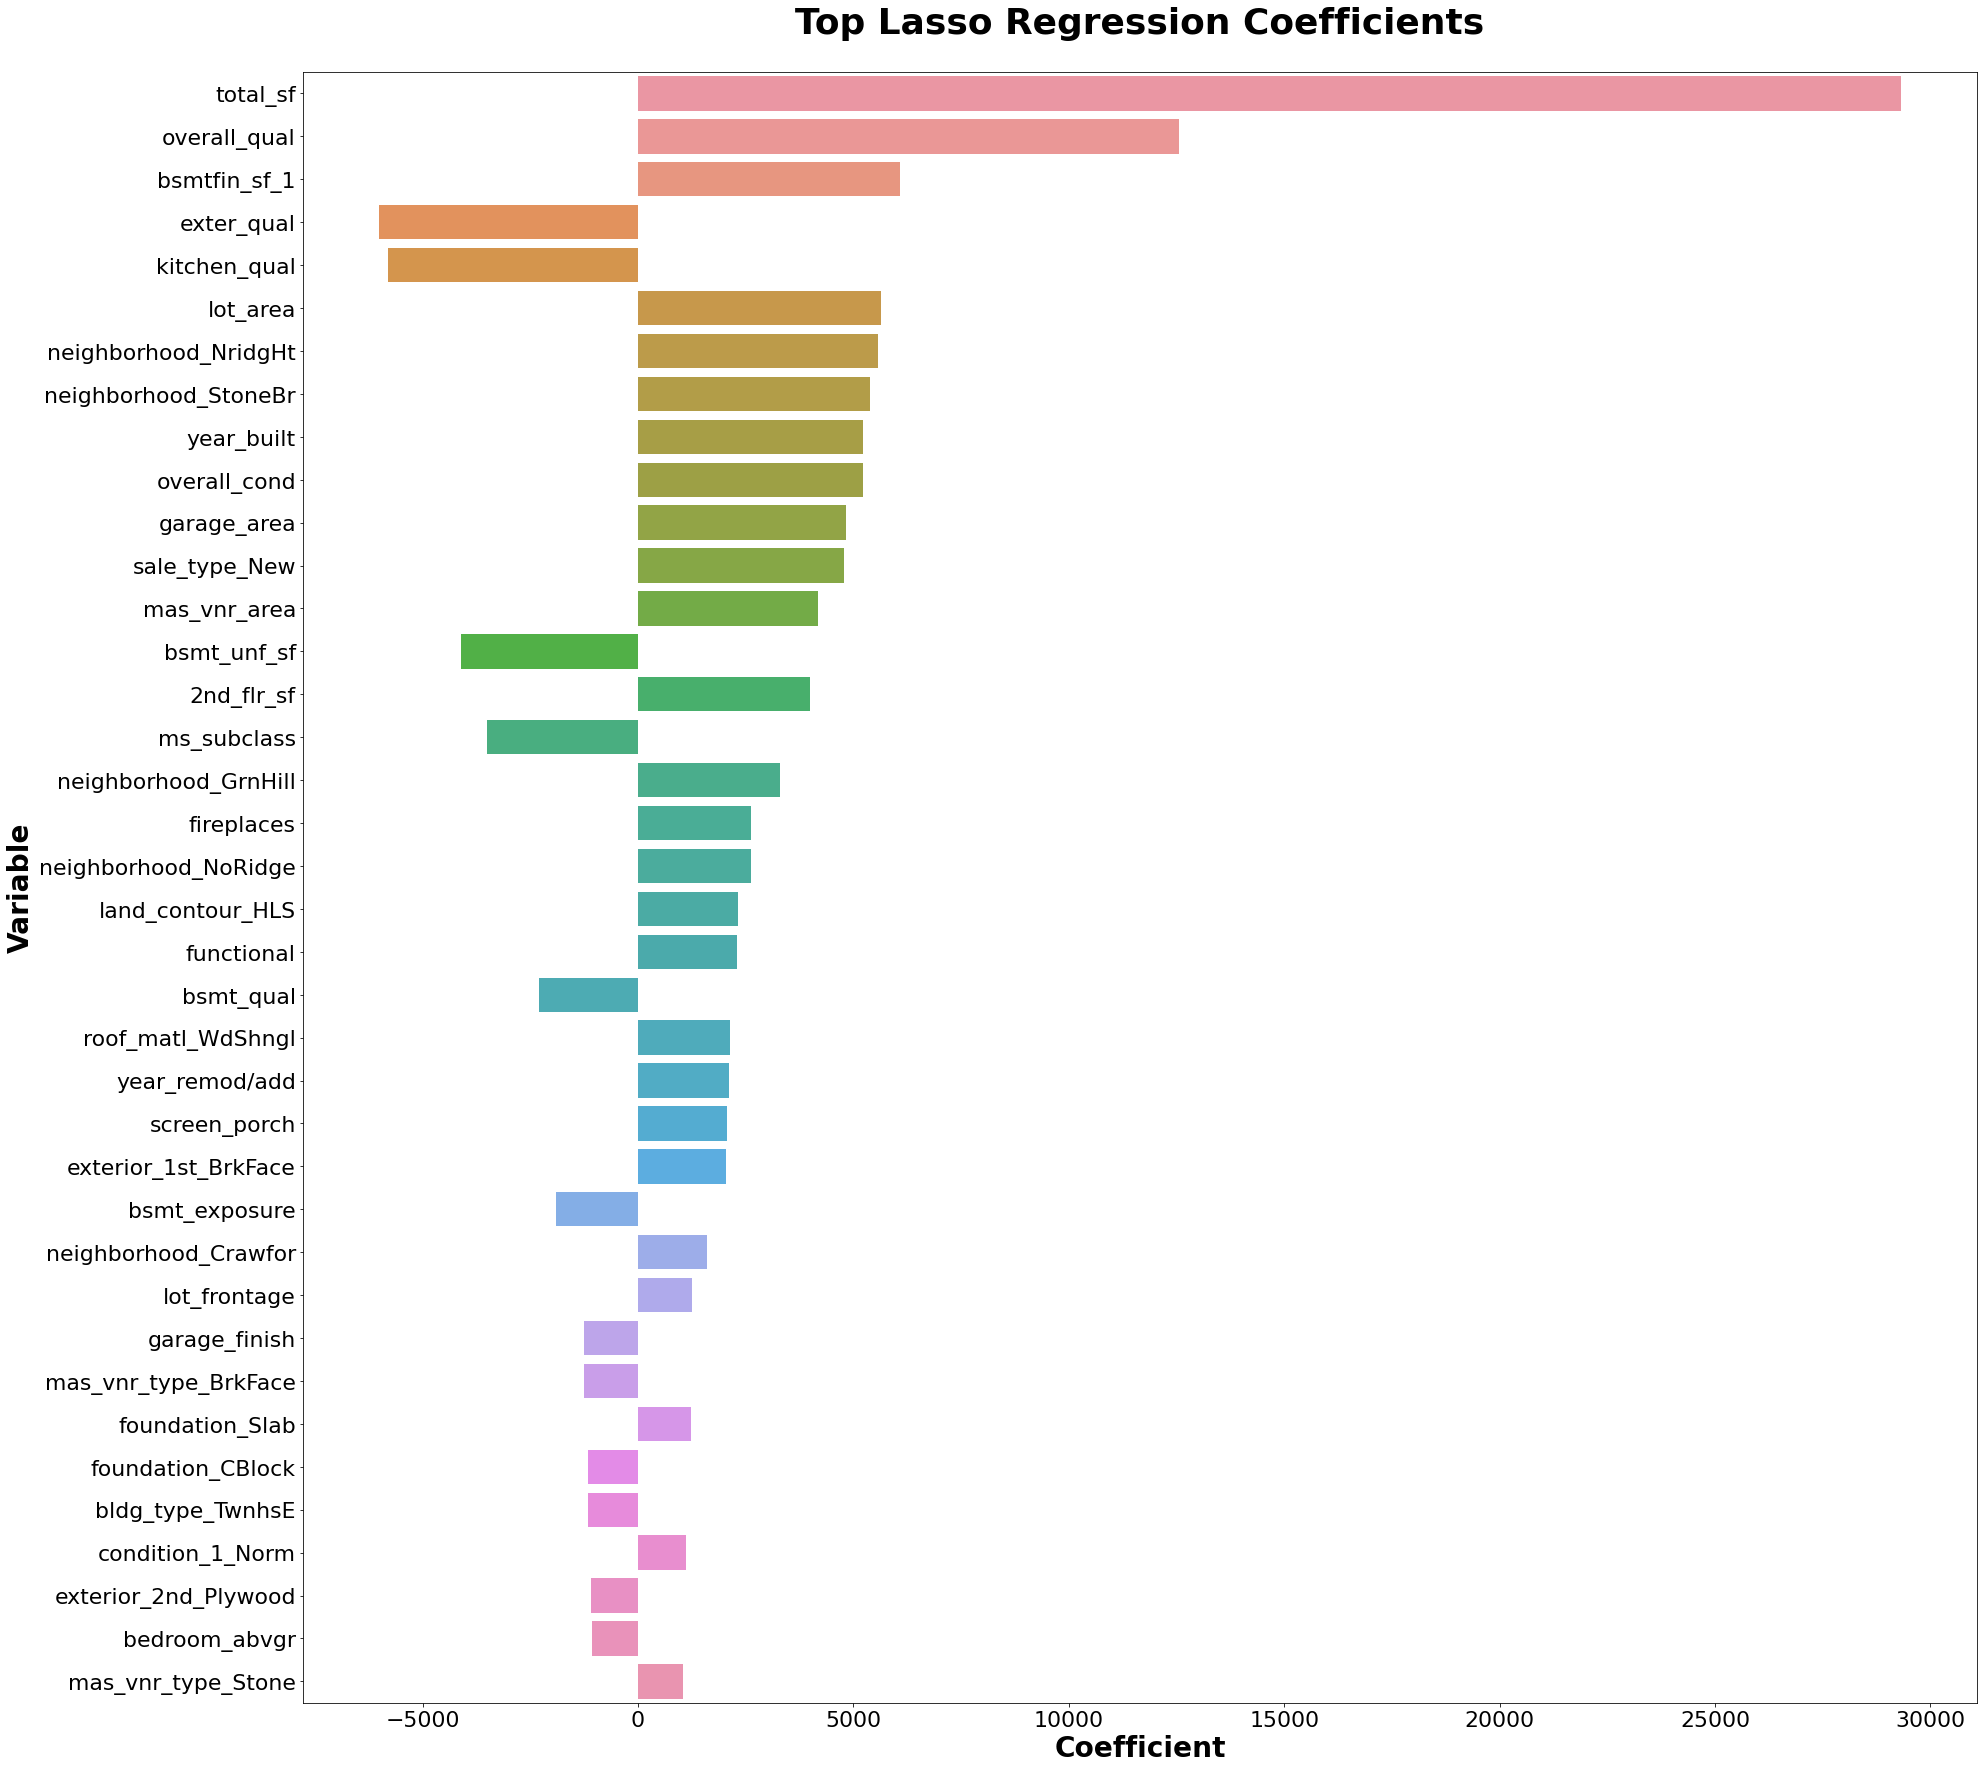

In [92]:
# Plot the Top Lasso Regression coefficients
lasso_coeffs_strong = lasso_coeffs.loc[lasso_coeffs['Absolute Coefficient'] > 1000]

plt.rcParams['axes.labelsize'] = 28
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (30, 30))

fig = sns.barplot(x = 'Coefficient', y = 'Variable', data = lasso_coeffs_strong, orient = 'h')

fig.set_title('Top Lasso Regression Coefficients', 
              y = 1.02, fontsize = 36, fontweight = 'bold')
axes.tick_params(axis = 'both', which = 'major', labelsize = 22)
axes.set_xlabel(axes.get_xlabel(), fontdict = {'weight': 'bold'})
axes.set_ylabel(axes.get_ylabel(), fontdict = {'weight': 'bold'})

## 5. Conclusion

We have chosen the Ridge regression model as it has slightly higher R2 and has slightly lower RMSE as compared to the 2 other models. For the Ridge model, 89.8% of the variability in sale price is explained by the features in our model. The Ridge model was off by about $25,448 in its predictions.

We can further improve the model by rerunning the model after dropping variables with Lasso Regression coefficients close to zero.

The most important features that affect the sale price are overall quality of the houses and total area of the house. We suggest our clients to maximise their total property area to include basement, garage, above grade living area etc. They can also do some renovation to improve the overall quality of the house and do regular maintenance to keep the house in a tip top condition.